<div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools, Lecture 5 Day 1</div>
<div style="text-align: right">Dino Konstantopoulos, 02 02 2020, with material from Chris Fonnesbeck and Cyrille Rossant</div>
<div style="text-align: right"><i>please browse all URLs in this notebook</i></div>

Last week, we learned **probability theory**. Basically, *if you can count* by building your random-variable sets and the predicates you want to apply on the datasets with python, you do not need to know the math behind probability theory (but knowing some of the math is helpful). We even did a quick intro to **Bayes' formula**, which allows you to invert the precondition and the postcondition on a conditional probability to make probabilities easier to evaluate. That is very useful for data science interviews that involve probability questions. But Bayes' formula will open up a new universe of statistics for us, which we'll get into next class. For this class, let's learn **classical statistics** based on *classical probability theory*.

# Palindrome dates

Read today's date backwards. **Homework exercise**: When's the *last* time a date was a palindrome? When's the *next* time? Do you feel special?

In [ ]:
"02022020"[::-1]

# Classical Statistical Data Analysis with analytic distributions

>**DEFINITION**: What is a **random variable**? Find the math definition [here](https://en.wikipedia.org/wiki/Random_variable). I prefer *this* definition: it's an Excel column of data. The $x$s are the *names* of each row. The $y$s are the cell *values*. $x$ is called the random variable, and $y$ is called its **range** $f(x)$. $f$ is the function we're after, to figure out from the data. Often, all we can get to is its *approximation*. The function $f$ is revelatory of the *mechanism that produced the data*, called the **model**. That is **data science** in a nutshell.

A common question then follows: Wait a minute, the data may not be **random**. Why do you use the word **random**?

Well, according to [Ramsey theory](https://en.wikipedia.org/wiki/Ramsey_theory), ideal randomness is *impossible* especially for large structures. While disorder is more probable in general, complete disorder is *impossible*. Misunderstanding of this can lead to numerous [conspiracy theories](https://en.wikipedia.org/wiki/Conspiracy_theory). Saying randomness is impossible is tantamount to saying that a Uniform distribution (which we'll examine further below) for the random variable is *not possible*. In other words, it's not like throwing the dice, or flipping a coin. There must be *some order* in the data if it's produced by a natural phenomenon, and a histogram can help detect this order. For example, did you know that the number of emails you receive a day is ***not random***, meaning that if you count the humber of emails, all possible numbers are not equally probably? It's not like throwing the dice!

The corollary of this of course is that if data is not random, you can model it and predict it!

Machine models like regression forests are *sexy* because the computer builds the model (the function approximation) for you, but there are many cases where ***you can build the model for you*** (i.e. find the $f$), and before powerful computers, statisticians did not know about ML so they found the $f$ using math. So let's go back in time a couple of decades at least and look at what Neanderthal data scientists did. Actually, there is good stuff to learn.

The primary goal of statistical data analysis is to create a **model** for the data so you can throw away the data and use the model instead. After all, we already know *that is what intelligence is all about*. The more (low-dimensional) models you have, the less storage you need, the more models you can accomodate, the cleverer you are!

A model's goal is usually to relate the influence of one variable on another. For example, how different medical interventions influence the incidence or duration of disease, how baseball players' performance varies as a function of age, how infectious diseases like the Coronavirus influence the stock market. The independent variable(s) $x$ is(are) called the predictor variable(s). The variable(s) $y$ to predict is(are) called the dependent variable(s), or target(s). We build the function approximation that gives us $y$ from $x$. *That* ***is*** data science.

>**WHY** am I repeating myself? Because this is **so** important!

**Bayesian models**, which we're going to look at soon, involve advanced probabilistic programming. We only *now* have the computer power to run these programs. What did Neanderthal man do when he tried to do statistical data analysis?

<br />
<center>
<img src =ipynb.images/caveman.png width = 400 />
</center>

In this notebook we'll take a look at the two most popular statistical data science methods prior to the resounding success of modern Bayesian estimation: **Method Of Moments** (MOM) and **Maximum Likelihood Estimation** (MLE). We'll skip over **Maximum A Posteriori** (MAP) estimation.

But first, we learn more **statistics**!

# More about *distributions*

Statistical **point** ***features*** is probably the most used statistics concept in data science. It is often
the first statistics technique you would apply when exploring a column of a dataset (i.e. a *random variable*)
and includes concepts such as **bias, variance, mean, median, percentiles**, and others. It’s all fairly easy to
understand and implement in code, and `pandas`'s `.describe()` dataframe API gives you most of them!

A **box (or whisker) plot** perfectly illustrates what we can do with basic statistical features of a random variable:

- The line in the middle is the median value of the data. Median is used over the mean
since it is more robust to outlier values. The first quartile is essentially the 25th
percentile; i.e 25% of the points in the data fall below that value. The third quartile is the
75th percentile; i.e 75% of the points in the data fall below that value. The min and max
values represent the upper and lower ends of our data range.

- When the box plot is short it implies that much of your data points are similar, since
there are many values in a small range

- When the box plot is tall it implies that much of your data points are quite different,
since the values are spread over a wide range

- If the median value is closer to the bottom then we know that most of the data has
lower values. If the median value is closer to the top then we know that most of the
data has higher values. Basically, if the median line is not in the middle of the box
then it is an indication of skewed data.

- Are the whiskers very long? That means your data has a high standard deviation
and variance i.e the values are spread out and highly varying. If you have long
whiskers on one side of the box but not the other, then your data may be highly
varying only in one direction.

/Users/CYH/opt/anaconda3/envs/theano/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  


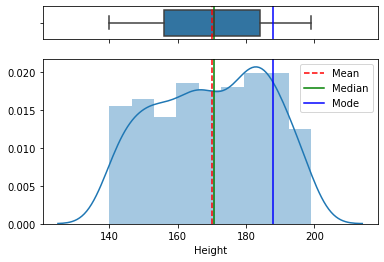

In [2]:
#from __future__ import print_function, division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv("data/500_Person_Gender_Height_Weight_Index.csv")
df.head()

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df['Height'].mean()
median=df['Height'].median()
mode=df['Height'].mode().get_values()[0]

sns.boxplot(df["Height"], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')
ax_box.axvline(mode, color='b', linestyle='-')

sns.distplot(df["Height"], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')
ax_hist.axvline(mode, color='b', linestyle='-')

plt.legend({'Mean':mean,'Median':median,'Mode':mode})

ax_box.set(xlabel='')
plt.show()

The **histogram**, which we plotted here above below the whisker plot is super-important: It tells us *how* the data is distributed and gives us the opportunity to find the function that approximates our data: It needs to produce (fake) data that has the same histogram as the real data. The histogram is a **probability distribution**.

>**DEFINITION**: A **probability distribution** is a function which represents the probabilities of all possible values in an experiment

Notice how we went from *frequencies* (of the value of a random variable), which is what you get in a histogram, to *probabilities* of a random variable. Does this surprise you? Shouldn't, we used our `p` function to easily go from 2-child Danish B/G frequencies to probability distributions for BB, BG, GB, GG. Probabilities is nothing more than renormalized frequencies!

>**DEFINITION**: The **expected value** of a discrete random variable is the probability-weighted average of all its possible values. In other words, each possible value the random variable can assume is multiplied by its probability of occurring, and the resulting products are summed to produce the expected value. Intuitively, a random variable's expected value represents the mean of a large number of independent realizations of the random variable. The expected value is also known as the **expectation**, mathematical expectation, **mean**, or **first moment**.

Here are some classic well-known theoretical distributions whose histograms are very well-defined and which happen to model data that usually occurs on planet Earth (much like the Fibonacci numbers and the Golden ratio appear in nature):

- A [Bernoulli Distribution]() has only two possible outcomes and a single trial. A simple example can be a single toss of a biased/unbiased coin. In this example, the probability that the outcome might be heads can be considered equal to p and (1 - p) for tails (the probabilities of mutually exclusive events that encompass all possible outcomes needs to sum up to one).


- A [binomial Distribution]() can be thought as the sum of outcomes of an event following a Bernoulli distribution. The Binomial Distribution is therefore used in binary outcome events and the probability of success and failure is the same in all the successive trials. This distribution takes two parameters as inputs: the number of times on event takes place and the probability assigned to one of the two classes. The binomial distribution is frequently used to model the number of successes in a sample of size n drawn with replacement from a population of size N. If the sampling is carried out without replacement, the draws are not independent and so the resulting distribution is a hypergeometric distribution, not a binomial one. However, for N much larger than n, the binomial distribution remains a good approximatio. A simple example of a Binomial Distribution in action can be the toss of a biased/unbiased coin repeated a certain amount of times, or picking balls from an urn (with replacement) that contains balls of two different colors. The main characteristics of a Binomial Distribution are:
 - Given multiple trials, each of them is independent of each other (the outcome  of one trial doesn't affect another one).
 - Each trial can lead to just two possible results (eg. winning or losing), which have probabilities p and (1 - p).


- A [Uniform Distribution](https://en.wikipedia.org/wiki/Uniform_distribution_(continuous)) is the most basic of the seven we show here. It has a *single value* which only occurs in a certain range while anything outside that range is just 0. It’s very much an *on or off* distribution. We can also think of it as an indication of a
categorical variable with 2 categories: 0 or the value. Your categorical variable might
have multiple values other than 0 but we can still visualize it in the same was as a
piecewise function of multiple uniform distributions.


- A [Normal Distribution](https://en.wikipedia.org/wiki/Normal_distribution), commonly referred to as a **Gaussian Distribution**, is specifically defined by its **mean** and **standard deviation**. The mean value shifts the
distribution spatially (measure of *centrality*) and the standard deviation controls the *spread*. The import
distinction from other distributions (e.g Poisson) is that the standard deviation is the
*same in all directions*. Thus with a Gaussian distribution we know the average value
of our dataset as well as the spread of the data i.e is it spread over a wide range or is
it highly concentrated around a few values.


- A [Poisson Distribution](https://en.wikipedia.org/wiki/Poisson_distribution) is similar to the Normal but with an added factor of skewness. With a low value for the skewness a poisson distribution will have
relatively uniform spread in all directions just like the Normal. But when the
skewness value is high in magnitude then the spread of our data will be different in
one direction: It will be very *spread out* in one direction and in the other it will be
*highly concentrated*. Poisson Processes are used to model a series of discrete events in which we know the average time between the occurrence of different events but we don’t know exactly *when* each of these events might take place. For example, events that can be counted (e.g. emails or text messages). A process can be considered to belong to the class of Poisson Processes if it can meet the following criterias:
 - The events are independent of each other (if an event happens, this does not alter the probability that another event can take place).
 - Two events can’t take place simultaneously.
 - The average rate between events occurrence is constant.


- A [Gamma Distribution](https://en.wikipedia.org/wiki/Gamma_distribution) is a distribution that arises naturally in processes for which the ***waiting times between events are relevant***. It can be thought of as a **waiting time** between **Poisson distributed events**, such as in when you wait for the "T" (i.e. queuing models), climatology, and financial services. Examples of events that may be modeled by a gamma distribution include but are not limited to:
 
 - Public transportation
 - Amount of [rainfall](http://journals.tubitak.gov.tr/engineering/issues/muh-00-24-6/muh-24-6-7-9909-13.pdf). accumulated in a reservoir
 - The size of loan defaults or aggregate [insurance claims](https://www.crcpress.com/Statistical-and-Probabilistic-Methods-in-Actuarial-Science/Boland/p/book/9781584886952)
 - The flow of items through manufacturing and distribution processes
 - Visitors to a website
 - Customers calling a help center 
 - Radioactive decay in atoms
 - Movements in a stock price


- A [Random walk](https://en.wikipedia.org/wiki/Random_walk) (or [Brownian motion](https://en.wikipedia.org/wiki/Brownian_motion)) can be any sequence of discrete steps (of always the same length) moving in **random directions**. Random Walks can take place in any type of dimensional space (eg. 1D, 2D, nD).
Specfically, a **Random Walk** is used to describe a *discrete-time process* while **Brownian Motion** can be used to describe a continuous-time random walk. Some examples of random walks applications are: tracing the path taken by molecules when moving through a gas during the diffusion process, sports events predictions etc…


There are more theoretical distributions we'll learn in class but these seven already give
us a lot of value. We can quickly see and interpret our categorical variables with a
Uniform Distribution. There are many algorithms that by default will perform well specifically 
with Gaussian so we should use Gaussian Distribution as much as possible. And the Poisson and the Gamma/Brown 
model a lot of natural processes, respectively for discrete and continuous events.

In our last notebook, when we examined a Celtics team, we saw how when we add a lot of 
distributions together we tend to get a nice gaussian distribution, and for good reason,
there is a great theorem behind this fact!

## The Uniform distribution

Simplest of all: same probability $y$ for all possible values of the random variable $x$. Becomes apparent when we plot a lot of experiments:

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


0.49607506411935615
0.28810668234083764


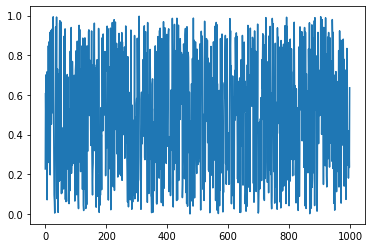

In [3]:
from pymc3 import Uniform

y = Uniform.dist()
samples = y.random(size=1000)
print(samples.mean())
print(samples.std())
plt.plot(samples)

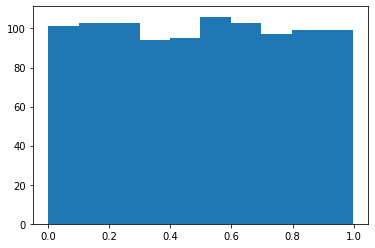

In [4]:
plt.hist(samples);

0.501559405611442
0.28678677800513164


(array([ 98., 107.,  99.,  93., 107.,  94., 112.,  87., 104.,  99.]),
 array([0.0058349 , 0.10518242, 0.20452994, 0.30387746, 0.40322497,
        0.50257249, 0.60192001, 0.70126753, 0.80061505, 0.89996257,
        0.99931008]),
 <a list of 10 Patch objects>)

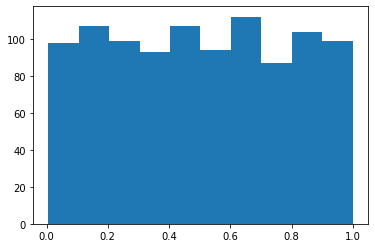

In [6]:
samples = y.random(size=1000)
print(samples.mean())
print(samples.std())
plt.hist(samples)

Why is the latter histogram *flatter*?

## The Bernoulli Distribution

Here we use `Scipy` to import it:

In [7]:
import scipy.stats as stats
# size = number of experiments
# p = probability of success
bern = stats.bernoulli.rvs(size=10000,p=0.5)

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Bernoulli Distribution')]

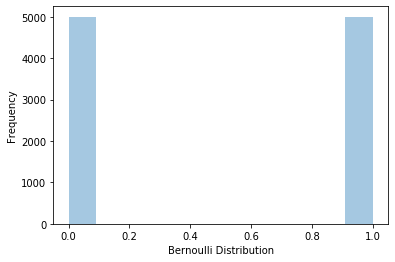

In [8]:
ax= sns.distplot(bern,
                 kde=False)
ax.set(xlabel='Bernoulli Distribution', ylabel='Frequency')

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Bernoulli Distribution')]

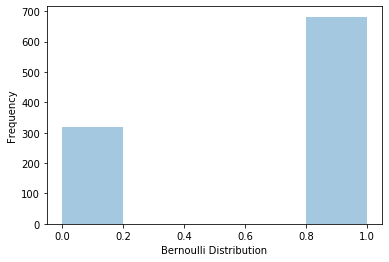

In [9]:
biased_bern = stats.bernoulli.rvs(size=1000,p=0.7)

ax= sns.distplot(biased_bern,
                 kde=False)
ax.set(xlabel='Bernoulli Distribution', ylabel='Frequency')

Let's build a **model** for a fair coin toss:

In [10]:
probs = np.full((2), 1/2)
face = [0,1]

Let's plot it:

(0, 1)

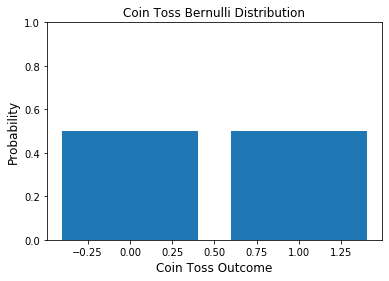

In [11]:
plt.bar(face, probs)
plt.ylabel('Probability', fontsize=12)
plt.xlabel('Coin Toss Outcome', fontsize=12)
plt.title('Coin Toss Bernulli Distribution', fontsize=12)
axes = plt.gca()
axes.set_ylim([0,1])

Let's build a **model** for a biased coin toss:

In [12]:
probs = np.array([0.75, 0.25])
face = [0, 1]

(0, 1)

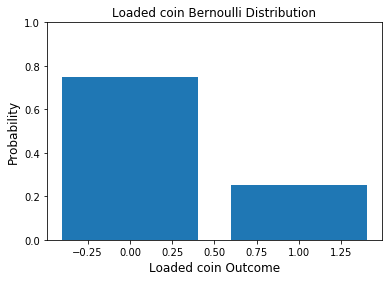

In [13]:
plt.bar(face, probs)
plt.title('Loaded coin Bernoulli Distribution', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.xlabel('Loaded coin Outcome', fontsize=12)
axes = plt.gca()
axes.set_ylim([0,1])

## The binomial Distribution

The Binomial Distribution can be thought as the sum of outcomes of an event following a Bernoulli distribution. It takes two parameters as inputs: the number of times on event takes place and the probability assigned to one of the two classes.

The probability of getting exactly k successes in n independent Bernoulli trials is given by: 

$$p(k,n,p) = (^n_k) p^k (1-p)^{n-k}$$

where

$$(^n_k) = \frac{n!}{k!\;(n-k)!}$$

The probability of getting exactly k successes in n independent Bernoulli trials can be plotted:

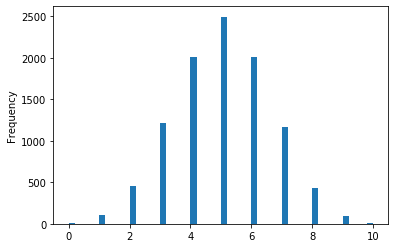

In [14]:
# size = number of experiments
# n = number of trials (number of trials for each experiment)
# p = probability that one of two events is going to take place
binomial_data = stats.binom.rvs(size=10000, n=10, p=0.5, random_state=0)
pd.Series(binomial_data).plot(kind="hist", bins = 50)

So for n=10 and p=0.5, the probably of 5 successes is the highest, and the distribution of the number of successes is very gaussian-like!

Changing the probability value changes how the distribution looks like.

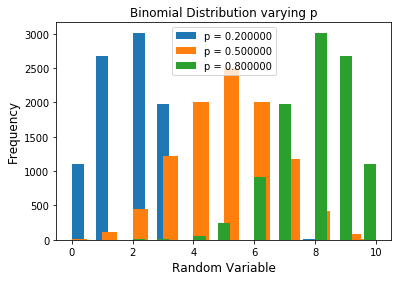

In [15]:
for prob in range(2, 10, 3):
    binomial_data = stats.binom.rvs(size=10000, n=10, p=0.1*prob, 
                                    random_state=0)
    
    pd.Series(binomial_data).plot(kind="hist", bins = 20, 
                              label="p = {:f}".format(0.1*prob))
    plt.xlabel('Random Variable', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title("Binomial Distribution varying p")
    plt.legend()

It *skews* the distribution to the left or the right!

## The Normal Distribution

</br >
<center>
<img src="ipynb.images/ohnonotmath.png" width=200 />
</center>

Also known as the **gaussian** distribution.

For ***continuous random variables***:

$$X \in [0,1]$$

$$Y \in (-\infty, \infty)$$

Its **probability *density* function** (pdf): 

For continuous $X$,

$$Pr(x \le X \le x + dx) = f(x|\theta)dx \, \text{ as } \, dx \rightarrow 0$$

![Continuous variable](https://upload.wikimedia.org/wikipedia/commons/7/74/Normal_Distribution_PDF.svg)

<div style="font-size: 110%;">  
$$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left[-\frac{(x-\mu)^2}{2\sigma^2}\right]$$
</div>

* $X \in \mathbf{R}$
* $\mu \in \mathbf{R}$
* $\sigma>0$

The **expectation** (or first moment), and the **standard deviation** (or second moment) of a gaussian are:
$$\begin{align}E(X) &= \mu \cr
\text{Var}(X) &= \sigma^2 \end{align}$$

-1.9640179860232416
4.000019865500027


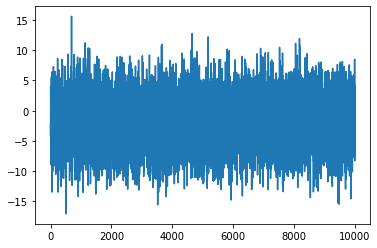

In [16]:
from pymc3 import Normal

y = Normal.dist(mu=-2, sd=4)
samples = y.random(size=10000)
print(samples.mean())
print(samples.std())
plt.plot(samples);

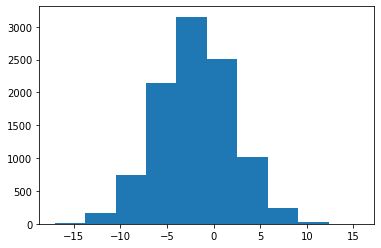

In [17]:
plt.hist(samples);

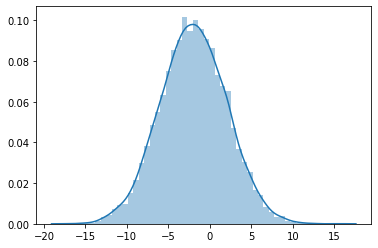

In [18]:
sns.distplot(samples)
ax_hist.axvline(samples.mean(), color='r', linestyle='--')

If you wanted to use `Scipy` to model the normal distribution, you would use the ***r***andom ***v***ariate***s*** API `.rvs()`:

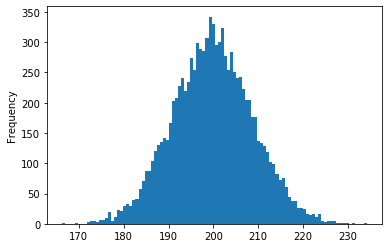

In [19]:
# size = number of data points
# loc = mean
# scale = standard deviation
normal_dist = stats.norm.rvs(size=10000, loc=200, scale=9, 
                             random_state=0) 

pd.Series(normal_dist).plot(kind="hist", bins=100)

Here we plot different means:

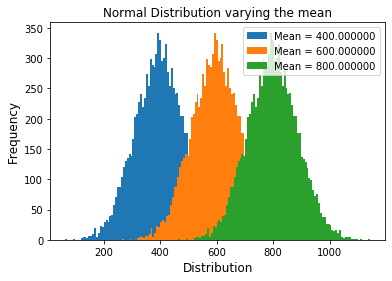

In [20]:
for mean in range(400, 900, 200):
    normal_dist = stats.norm.rvs(size=10000, loc=mean, scale=90, 
                             random_state=0) 
    pd.Series(normal_dist).plot(kind="hist", bins=100, 
                                label="Mean = {:f}".format(mean))
    plt.xlabel('Distribution', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title("Normal Distribution varying the mean")
    plt.legend()

## The Poisson distribution

For ***discrete random variables***, the Poisson distribution models **unbounded counts**:

$$X = \{0,1,2,3,\ldots \}$$

$$Y = \{\ldots,-2,-1,0,1,2,\ldots\}$$

Its **probability *mass* function**: 

$$Pr(X=x) = f(x\;|\; \theta)$$

![Discrete variable](http://upload.wikimedia.org/wikipedia/commons/1/16/Poisson_pmf.svg)

<div style="font-size: 120%;">  
$$Pr(X=x)=\frac{e^{-\lambda}\lambda^x}{x!}$$
</div>

* $X=\{0,1,2,\ldots\}$
* $\lambda > 0$

One useful property of the Poisson distribution is that its **expectation** (or first moment) as well as its **standard deviation** (or second moment) are equal to its *sole* parameter, i.e.:

$$E(X) = \text{Var}(X) = \lambda$$

Let's take random samples from a Poisson process and plot their histogram. You will see it reproduces a Poisson distribution. That is to say, random samples from a Poisson process yields a Poisson Distribution. This means that the statistics of a Poisson process are not exactly completely random. Rather, they follow a predictable behavior.

That is because Poisson processes model **counts**. For example, counts of SMS messages you receive per day. Let's say, if you're a popular student, you receive from 0 to 100 messages a day. On every single day, I can thus expect you receive about 50 messages, right? It's a rare day you receive 0, or 100.

0.85
0.9630680142129111


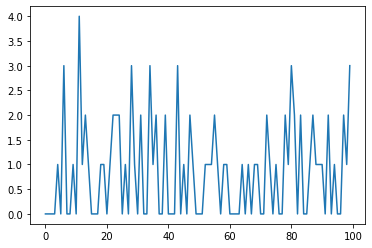

In [21]:
from pymc3 import Poisson

x = Poisson.dist(mu=1)
samples = x.random(size=100)
print(samples.mean())
print(samples.std())
plt.plot(samples)

0.978
0.9947441882212733


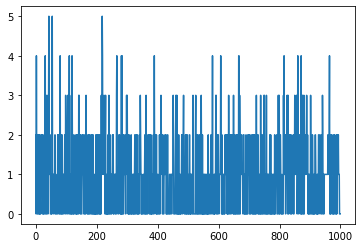

In [22]:
x = Poisson.dist(mu=1)
samples = x.random(size=1000)
print(samples.mean())
print(samples.std())
plt.plot(samples)

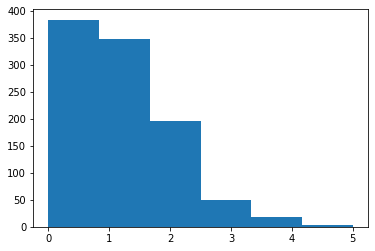

In [23]:
plt.hist(samples, bins=len(set(samples)));

We can also use `NumPy` to model a Poisson process:

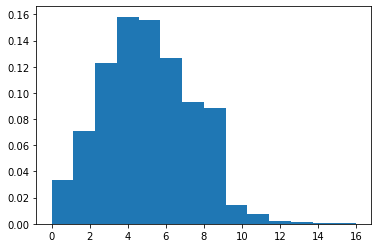

In [24]:
s = np.random.poisson(5, 10000)
plt.hist(s, 14, density=True)
plt.show()

In [25]:
np.random.poisson(lam=(100., 500.), size=(5, 2))

array([[ 85, 511],
       [100, 521],
       [ 98, 524],
       [101, 472],
       [111, 503]])

Here we see how the cumulative sum of a Poisson random variable is a linear curve, since the expectation is constant:

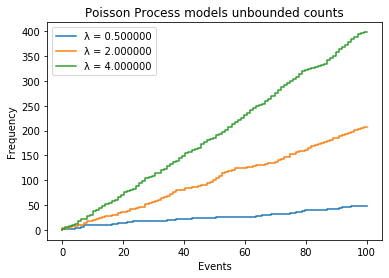

In [26]:
N = 100 # Events
lambdas = [0.5, 2, 4]
X_T = [np.random.poisson(lam, size=N) for lam in lambdas]
S = [[np.sum(X[0:i]) for i in range(N)] for X in X_T]
X = np.linspace(0, N, N)
 
# Plot the graph
graphs = [plt.step(X, S[i], label="λ = %f"%lambdas[i])[0] 
          for i in range(len(lambdas))]
plt.legend(handles=graphs)
plt.title("Poisson Process models unbounded counts")
plt.xlabel("Events")
plt.ylabel("Frequency")
plt.show()

## The Gamma distribution

This is the [**gamma distribution**](https://en.wikipedia.org/wiki/Gamma_distribution):

<div style="font-size: 120%;">  
$$f(x) = \frac{\beta^\alpha x^{\alpha -1} e^{- \beta x}}{\Gamma (\alpha)}$$
</div>

And... what is the $\Gamma()$ function? It [interpolates](https://en.wikipedia.org/wiki/Gamma_function) the factorial function to non-integer values. Pretty cool.

The gamma distribution is a ***two-parameter*** ($\alpha, \beta$) family of ***continuous*** probability distributions. There are [three different parametrizations](https://en.wikipedia.org/wiki/Gamma_distribution) in common use! For the one here (more common in Bayesian statistics), the **expectation** (or first moment) of the Gamma is $E[x] = α/β$.

In Bayesian statistics, the **gamma distribution** is used as a [**conjugate prior**](https://en.wikipedia.org/wiki/Conjugate_prior) distribution for the **exponential distribution** and the **Poisson distribution**. In Bayesian probability theory (which we'll look into soon), if the posterior distributions $p(θ \;|\; x)$ are in the same probability distribution family as the prior probability distribution $p(θ)$, the prior and posterior are then called **conjugate distributions**.

Recall Bayes' formula:

$$p(θ \; | \; x) = \frac{p(x \;| \; θ) \; p(θ)}{p(x)}$$

>**DEFINITIONS**: $p(x \;| \; θ)$ is called the **likelihood** function, $p(θ \; | \; x)$ is called the **posterior** function, and $p(θ)$ is called the **prior** function.

For $x > 0$ and $\alpha, \beta > 0$

</br >
<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/e/e6/Gamma_distribution_pdf.svg" width="500" />
Gamma distribution
</center>

0.985
0.980191307857808


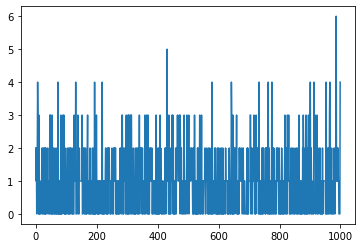

In [27]:
from pymc3 import Gamma

x = Poisson.dist(mu=1)
samples = x.random(size=1000)
print(samples.mean())
print(samples.std())
plt.plot(samples)

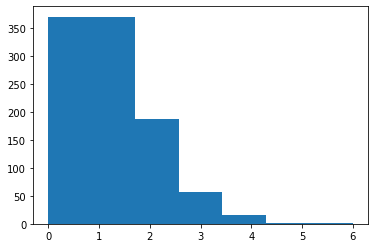

In [28]:
plt.hist(samples, bins=len(set(samples)));

It is very tempting to confuse a Gamma for a Poisson. Be especially careful about the underlying model. Are you estimating *discrete* or *continuous* random variables?

In Bayesian inference, the gamma distribution is the conjugate prior to many likelihood distributions: the Poisson, [exponential](https://en.wikipedia.org/wiki/Exponential_distribution), normal (with known mean), Pareto, gamma itself with known shape parameter, inverse gamma with known shape parameter, and [Gompertz](https://en.wikipedia.org/wiki/Gompertz_distribution) with known scale parameter.

## Random walk/Brownian motion

Let's start in 1D. Doesn't this look very much like a profile of a stock price?

Text(0.5, 1.0, 'Random Walk in 1D')

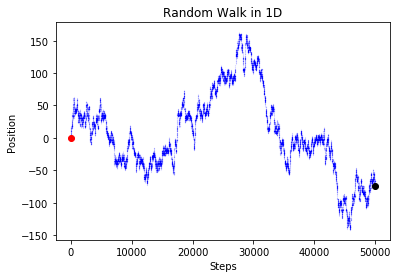

In [29]:
# Defining parameters for the walk
dims = 1
step_n = 50000
step_set = [-1, 1]
origin = np.zeros((1,dims))
# Simulate steps in 1D
step_shape = (step_n,dims)
steps = np.random.choice(a=step_set, size=step_shape)
path = np.concatenate([origin, steps]).cumsum(0)
start = path[:1] # first element 
stop = path[-1:] # last element
# Plot the path
#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(np.arange(step_n+1), path, c='blue',alpha=0.35, s=0.005);
plt.plot(0, start, c='red', marker='o')
plt.plot(step_n, stop, c='black', marker='o')
plt.xlabel("Steps")
plt.ylabel("Position")
plt.title('Random Walk in 1D')

Now in 2D:

Text(0.5, 1.0, 'Random Walk in 2D')

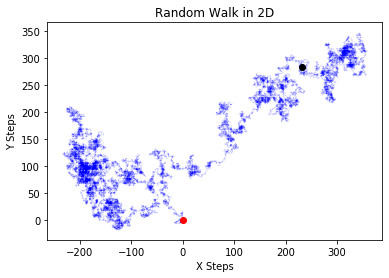

In [30]:
# Defining parameters for the walk
dims = 2
step_n = 50000
step_set = [-1, 1]
origin = np.zeros((1,dims))
# Simulate steps in 1D
step_shape = (step_n,dims)
steps = np.random.choice(a=step_set, size=step_shape)
path = np.concatenate([origin, steps]).cumsum(0)
start = path[:1] # first element 
stop = path[-1:] # last element 
# Plot the path
#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(path[:,0], path[:,1],c='blue', alpha=0.35, s=0.005);
plt.plot(start[:,0], start[:,1],c='red', marker='o')
plt.plot(stop[:,0], stop[:,1],c='black', marker='o')
plt.xlabel("X Steps")
plt.ylabel("Y Steps")
plt.title('Random Walk in 2D')

Now in 3D:

Text(0.5, 0.92, 'Random Walk in 3D')

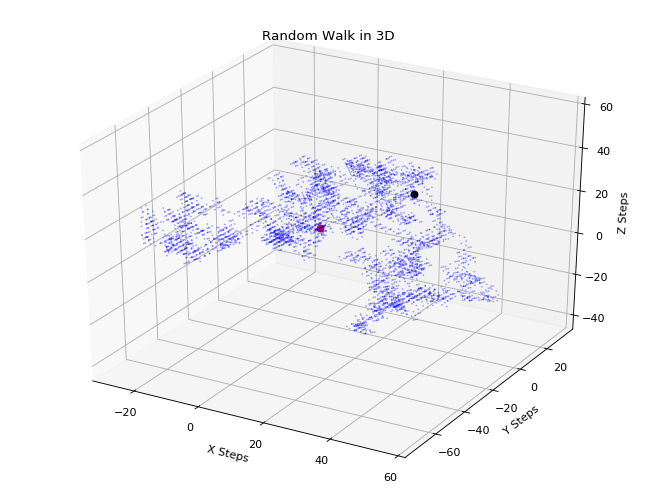

In [31]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import figure

# Defining parameters for the walk
dims = 3
step_n = 5000
step_set = [-1, 1]
origin = np.zeros((1,dims))
# Simulate steps in 3D
step_shape = (step_n,dims)
steps = np.random.choice(a=step_set, size=step_shape)
path = np.concatenate([origin, steps]).cumsum(0)
start = path[:1] # first element 
stop = path[-1:] # last element
# Plot the path
fig = figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
ax = Axes3D(fig)
ax.set_xlabel('X Steps')
ax.set_ylabel('Y Steps')
ax.set_zlabel('Z Steps')
ax.scatter3D(path[:,0], path[:,1], path[:,2], c='blue', alpha=0.35, s=0.3)
ax.plot3D(start[:,0], start[:,1], start[:,2], c='red', marker='o')
ax.plot3D(stop[:,0], stop[:,1], stop[:,2], c='black', marker='o')
plt.title('Random Walk in 3D')

How would you plot it in 4D?

# pdf, cdf, ppf

A [probability density function](https://en.wikipedia.org/wiki/Probability_density_function) (pdf) gives us the probability of a random variable assuming a certain value ($y$ from $x$):

In [32]:
stats.norm.pdf(x=168,         # Value to check for the random variable
               loc=174,       # mean
               scale=8.2)     # standard deviation

0.03722515686677741

In [33]:
stats.norm.pdf(x=174,         # Value to check for the random variable
               loc=174,       # mean
               scale=8.2)     # standard deviation

0.04865149760993082

In [34]:
stats.norm.pdf(x=180,         # Value to check for the random variable
               loc=174,       # mean
               scale=8.2)     # standard deviation

0.03722515686677741

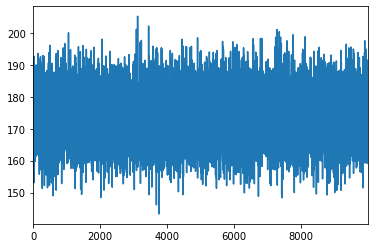

In [35]:
normal_dist = stats.norm.rvs(size=10000, loc=174, scale=8.2, 
                             random_state=0) 

f = pd.Series(normal_dist).plot()

Just for kicks..

In [36]:
from sklearn import preprocessing
normal_dist_scaled = preprocessing.MinMaxScaler().fit_transform(pd.DataFrame(normal_dist, columns=['Score']))
normal_dist_scaled.shape

(10000, 1)

In [37]:
np.squeeze(normal_dist_scaled).shape

(10000,)

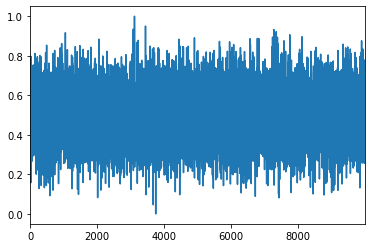

In [38]:
f = pd.Series(np.squeeze(normal_dist_scaled)).plot()

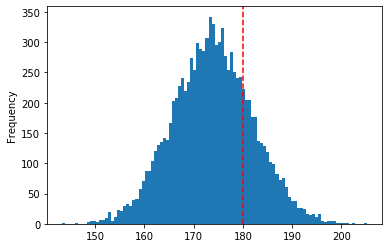

In [39]:
f = pd.Series(normal_dist).plot(kind="hist", bins=100)
f.axvline(180, color='r', linestyle='--')

Let's generate normal random variates, then plot their **histogram**:

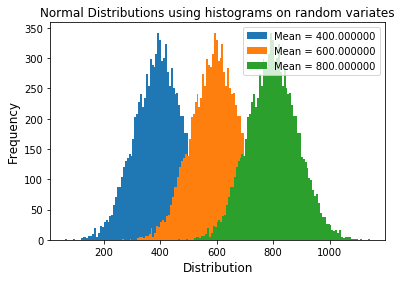

In [40]:
for mean in range(400, 900, 200):
    normal_dist = stats.norm.rvs(size=10000, loc=mean, scale=90, 
                             random_state=0) 
    pd.Series(normal_dist).plot(kind="hist", bins=100, 
                                label="Mean = {:f}".format(mean))
    plt.xlabel('Distribution', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title("Normal Distributions using histograms on random variates")
    plt.legend()

Let's plot the **pdf** of the same normal random variates:

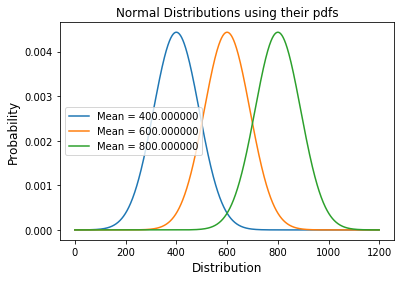

In [41]:
for mean in range(400, 900, 200):
    n = np.arange(0, 1200)
    normal = stats.norm.pdf(n, mean, 90)
    plt.plot(n, normal, label="Mean = {:f}".format(mean))
    plt.xlabel('Distribution', fontsize=12)
    plt.ylabel('Probability', fontsize=12)
    plt.title("Normal Distributions using their pdfs")
    plt.legend()

In other words, the **pdf** is the *theoretical* **histogram** of a known distribution!

The [cumulative distribution function](https://en.wikipedia.org/wiki/Cumulative_distribution_function) (CDF) gives us the probability of a certain random observation will have a lower value than the one provided:

In [42]:
stats.norm.cdf(x=186,         # Cutoff value (quantile) to check
               loc=174,       # Mean
               scale=8.2)     # Standard Deviation

0.9283230216395894

The [percent point function](https://en.wikipedia.org/wiki/Quantile_function) (PPF), also called [quantile function](https://en.wikipedia.org/wiki/Quantile_function) gives us the quantile using a probability as input (inverse of cumulative distribution function) ($x$ from $y$).

In [43]:
stats.norm.ppf(q=0.93,      # Cutoff value (quantile) to check
               loc=174,     # Mean
               scale=8.2)   # Standard Deviation

186.1014864310692

## Class Exercise

- How to model throwing a die with data science? Is that a perfectly random event, or not? What is the histogram that matches the experiment? Build a **model**.

- Build a **weighted die** that matches a gaussian distribution instead (in other words, build a model for it).

In [44]:
x = [0,1,2,3,4,5,6]
counts, bins = np.histogram(x, bins= 100)
bins = bins[:-1] + (bins[1] - bins[0])/2
probs = counts/float(counts.sum())
print(probs.sum()) # 1.0
plt.bar(bins, probs)
plt.show()

probs = np.full((6), 1/6)
face = \[1,2,3,4,5,6]
plt.bar(face, probs)
plt.ylabel('Probability', fontsize=12)
plt.xlabel('Dice Roll Outcome', fontsize=12)
plt.title('Fair Dice Uniform Distribution', fontsize=12)
axes = plt.gca()
axes.set_ylim([0,1])

probs = np.array([0.25, 0.125, 0.05, 0.4, 0.125, 0.05])
face = [1,2,3,4,5,6]
plt.bar(face, probs)
plt.title('Loaded dice (not uniform distribution)', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.xlabel('Dice Roll Outcome', fontsize=12)
axes = plt.gca()
axes.set_ylim([0,1])

n = np.arange(1, 7)
mean = 3.5
gaussian_dice = stats.norm.pdf(n, mean, 0.9)
plt.plot(n, gaussian_dice)

face = [1,2,3,4,5,6]
plt.bar(face, gaussian_dice)
plt.title('Loaded dice (gausian distribution)', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.xlabel('Dice Roll Outcome', fontsize=12)
axes = plt.gca()
axes.set_ylim([0,1])

SyntaxError: unexpected character after line continuation character (<ipython-input-44-438a73d2530c>, line 10)

# Distribution transformations

<div style="display: none;">
x = [0,1,2,3,4,5,6]
counts, bins = np.histogram(x, bins= 100)
bins = bins[:-1] + (bins[1] - bins[0])/2
probs = counts/float(counts.sum())
print(probs.sum()) # 1.0
plt.bar(bins, probs)
plt.show()

probs = np.full((6), 1/6)
face = \[1,2,3,4,5,6]
plt.bar(face, probs)
plt.ylabel('Probability', fontsize=12)
plt.xlabel('Dice Roll Outcome', fontsize=12)
plt.title('Fair Dice Uniform Distribution', fontsize=12)
axes = plt.gca()
axes.set_ylim([0,1])

probs = np.array([0.25, 0.125, 0.05, 0.4, 0.125, 0.05])
face = [1,2,3,4,5,6]
plt.bar(face, probs)
plt.title('Loaded dice (not uniform distribution)', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.xlabel('Dice Roll Outcome', fontsize=12)
axes = plt.gca()
axes.set_ylim([0,1])

n = np.arange(1, 7)
mean = 3.5
gaussian_dice = stats.norm.pdf(n, mean, 0.9)
plt.plot(n, gaussian_dice)

face = [1,2,3,4,5,6]
plt.bar(face, gaussian_dice)
plt.title('Loaded dice (gausian distribution)', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.xlabel('Dice Roll Outcome', fontsize=12)
axes = plt.gca()
axes.set_ylim([0,1])
</div>

<center>
    <img src="ipynb.images/birds-up.png" width=400 />
</center>

Real-world data can be messy. Some datasets contain attributes that need severe modifications before they can be used to do predictive modeling. What do I mean by that? I mean that ***more reliable predictions can be made if the predictors and the
target variable are closer to a normal distribution***. One way to getting them there if they're not is to *apply a transform to them*. Let's look at an example.

We're in Boston, so let's use a familiar Boston Housing Prices dataset to explore some techniques of
dealing with skewed data. There is no need to download it, as we can import it straight from `Scikit-learn`:

In [ ]:
from sklearn.datasets import load_boston

boston = load_boston()
x = boston['data']
y = boston['target']
cols = boston['feature_names']

df = pd.DataFrame(x, columns = cols)
df['Price'] = y
df.head()

How skewed is the `CRIM` column?

In [ ]:
df['CRIM'].skew()

Oh, that's a lot! Let's use the Seaborn library to make a histogram alongside with the KDE plot. 

In [ ]:
sns.distplot(df['CRIM'])

Let’s explore some methods for handling skewed data.

## Log Transform
Log transformation is most likely the first thing you should do to remove skewness from the predictor.
It can be easily done via `Numpy`, just by calling the log() function on the desired column

In [ ]:
crim_log = np.log(df['CRIM'])
crim_log.skew()

In [ ]:
sns.distplot(crim_log)

Much nicer, right? It’s not normally distributed for sure, but is a lot better than what we had before!

As you would expect, the log transformation isn’t the only one you can use. Let’s explore a couple of more options.

## Square Root Transform
The square root sometimes works great and sometimes isn’t the best suitable option. In this case, I still expect the transformed distribution to look somewhat exponential, but just due to taking a square root the range of the variable will be smaller.

In [ ]:
crim_sqrt = np.sqrt(df['CRIM'])
crim_sqrt.skew()

In [ ]:
sns.distplot(crim_sqrt)

The distribution is pretty much the same, but the range is smaller, as expected.

## Box-Cox Transform
The [Box-Cox transform](https://en.wikipedia.org/wiki/Power_transform#Box%E2%80%93Cox_transformation), named after statisticians [George Box](http://mathshistory.st-andrews.ac.uk/Biographies/Box.html) and [Sir David Roxbee Cox](https://www.britannica.com/biography/David-Cox-British-statistician) who collaborated on a 1964 paper and developed the technique, is another way of handling skewed data. To use it, your data must be positive — so that can be a bummer sometimes.

At the core of the Box Cox transformation is an exponent, $λ$, which varies from -5 to 5. All values of $λ$ are considered and the optimal value for your data is selected; The *optimal value* is the one which results in the best approximation of a normal distribution curve.

You can import the Box-Cox transform from `Scipy`, but the check for the skew you’ll need to convert the resulting Numpy array to a Pandas Series:

In [ ]:
from scipy import stats

crim_boxcox = stats.boxcox(df['CRIM'])[0]
pd.Series(crim_boxcox).skew()

In [ ]:
sns.distplot(crim_boxcox)

The distribution is pretty similar to the one made by the log transformation, but just a touch less bimodal in dispersion (since the two bumps are closer together), but more bimodal in centrality (since the two bumps are of almost equal magnitude).

Skewed data can mess up the power of your predictive model if you don’t address it correctly.

Should go without saying, but you should remember what transformation you’ve performed on which attribute, because you’ll *have to reverse it once when making predictions*!

In general, conducting transformations on the data before modeling it goes by the name of **kernel methods**.

# Method Of Moments (MOM) 

We'll illustrate the **Method of Moments** (MOM) with ***an example***. 

When you take a ***bad*** class in statistics, where you don't udnerstand or tend to fall asleep at the helm, it's the ***fault of the professor, not yours***.

<br />
<center>
<img src =ipynb.images/asleep.jpg width = 400 />
</center>

A good professor with give you the relevant equations and apply them to an ***interesting problem***. Then you’ll have an appreciation for how statistics helps us to understand the world. There are many **amazing phenomena** in the world, and we use data science as a tool for exploring them.

## The goal of Data Science

So, Neanderthal data scientists try to match the histogram of datasets to well-known theoretical profiles, and then they can use the theoretical profile (gaussian, gamma, etc.) to simulate data! 

With computers, ***we can do the same thing***, i.e. find the best approximation to our empirical histogram and then use libraries like `SciPy` to build simulations of (the process underlying) our data.

> **IMPORTANT**: Why do we want to produce data that *looks* different and yet follows the same histogram? Because we theorize that by capturing the histogram, we are modelling the *process* that produced the data, which is what we're really after. The process is bound to produce different-looking data every time, as long as it follows the precise statistics of the process. That is what **statistical science** is all about.

To understand this better, let's do some labs and try to leverage the parametrized distributions we just learned as potential models to datasets we observe. 

## Lab \#1: Nashville Precipitation

The dataset `nashville_precip.txt` contains NOAA precipitation data for the city of Nashville, Tennessee, measured since 1871. It is a classical dataset like the iris dataset. Download it from blackboard and put it in the right folder (you know..). The gamma distribution is a good fit to aggregated rainfall data, and will be our candidate distribution in this case. We'll use the gamma distribution model for Nashville precipitation to demonstrate MOM and MLE.

Let's peek at the data:

In [ ]:
import pandas as pd

In [ ]:
precip = pd.read_table("data/nashville_precip.txt", index_col=0, na_values='NA', delim_whitespace=True)
precip.head()

In the year 1971, in the month of January, Nashville saw 2.76 inches of rainfall.

### 1.1 Data Exploration: The Histogram

Let's do some data exploration with the ***histogram*** of precipitations per month. The histogram tells us, for each month of the year, what's the most frequent number of inches of rain from 1871 onward.

</br >
<center>
<img src="ipynb.images/rainfall.jpeg" width=400 />
</center>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
_ = precip.hist(sharex=True, sharey=True, grid=False)
plt.tight_layout()

The first step is recognizing what sort of distribution to fit our data to. A couple of observations:

1. The data is *skewed*, with a longer tail to the right than to the left
2. The data is positive-valued, since they are measuring rainfall
3. The data is continuous

Even just by ***eyeballing*** the histograms, ***even if you did not know what the Gamma distribution is usually used for***, a good option appears to be the **gamma distribution**: The curves look like ***Gaussians with long tails***. That's a Gamma!

<div style="font-size: 120%;">  
$$x \sim \text{Gamma}(\alpha, \beta) = \frac{\beta^{\alpha}x^{\alpha-1}e^{-\beta x}}{\Gamma(\alpha)}$$
</div>

### 1.2 Data Cleansing 

***Wait***, there's something ***wrong*** with our data.. if you open it in a text editor, you will find a value of **NA** for October of 1963 (take a look). 

So we have to do some **data cleansing** first. 

Given what we are trying to do, it is ***sensible*** to fill in the missing value with the average of the available values (another option would have been the average of the months of September and November 1963). Filling in with 0 would be a *bad idea*.


In [ ]:
precip.fillna(value={'Oct': precip.Oct.mean()}, inplace=True)
precip

### 1.3 Method of Moments

The **method of moments** simply assigns the **empirical** (coming from the data) **mean** and **variance** to their **theoretical counterparts** (coming from the *model*, in this case the Gamma!), so that we can ***solve for the parameters*** of the Gamma.

So, for the gamma distribution, the mean and variance turn out to be (analytically derived):

<div style="font-size: 120%;">  
$$ \hat{\mu} = \bar{X} = \alpha \beta $$
$$ \hat{\sigma}^2 = S^2 = \alpha \beta^2 $$
</div>

So, if we solve for these parameters, we can use a gamma distribution to describe our data, with parameters:

<div style="font-size: 120%;">  
$$ \alpha = \frac{\bar{X}^2}{S^2}, \, \beta = \frac{S^2}{\bar{X}} $$
</div>

($\bar{X}$ is the mean, while $S^2$ is the variance of each column of the dataset).

Now, let's calculate the sample ***moments of interest***: the **means** and **variances** *month by month*:

In [ ]:
precip_mean = precip.mean()
precip_mean

In [ ]:
precip_var = precip.var()
precip_var

We then use these moments to estimate $\alpha$ and $\beta$ for each month:
```python
alpha_mom = ...
beta_mom = ...
alpha_mom, beta_mom
```

<div style="display:none;">
alpha_mom = precip_mean ** 2 / precip_var
beta_mom = precip_var / precip_mean
</div>

In [ ]:
alpha_mom = precip_mean ** 2 / precip_var
beta_mom = precip_var / precip_mean

In [ ]:
alpha_mom, beta_mom

We can use the `gamma.pdf` function in `scipy.stats.distributions` to plot the distributions implied by the calculated alphas and betas. Yes, yes, I know, we have not *officially* introduced scipy yet..

</br >
<center>
<img src="https://c402277.ssl.cf1.rackcdn.com/photos/14785/images/story_full_width/shutterstock_532108075.jpg" width=400 />
Lazy Professor
</center>

For example, here is January (and note that scipy's gamma is the *gamma distribution*, not the $\Gamma$ function that interpolates $n!$ to real numbers, even though the $\Gamma$ function figures in the denominator of the gamma distribution):

In [ ]:
from scipy.stats.distributions import gamma

precip.Jan.hist(normed=True, bins=20)
plt.plot(np.linspace(0, 10), gamma.pdf(np.linspace(0, 10), alpha_mom[0], beta_mom[0]))

Not bad for january :-) Looping over all months now, we can create a grid of plots for the distribution of rainfall, using the gamma distribution:

```python
axs = precip.hist(normed=True, figsize=(12, 8), sharex=True, sharey=True, bins=15, grid=True)

for ax in axs.ravel():
    
    # Get month
    m = ax.get_title()
    
    # Plot fitted distribution
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, gamma.pdf(x, alpha_mom[m], beta_mom[m]))
    
    # Annotate with parameter estimates
    label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom[m], beta_mom[m])
    ax.annotate(label, xy=(10, 0.2))
    
plt.tight_layout()
```

<div style="display:none;">
axs = precip.hist(normed=True, figsize=(12, 8), sharex=True, sharey=True, bins=15, grid=True)

for ax in axs.ravel():
    
    # Get month
    m = ax.get_title()
    
    # Plot fitted distribution
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, gamma.pdf(x, alpha_mom[m], beta_mom[m]))
    
    # Annotate with parameter estimates
    label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom[m], beta_mom[m])
    ax.annotate(label, xy=(10, 0.2))
    
plt.tight_layout()
</div>

Good job, that was **data science** you did!

### 1.4 Conclusion

In math, a **moment** is a specific quantitative measure of the ***shape of a set of points***. 

The *zeroth* moment is the total mass, the *first* moment is the center of mass, the *second* moment is rotational inertia. Oops.. this is not mechanics 101, it's statistics 101...

So, the *zeroth* moment is total probability, *first* moment is the [mean](https://en.wikipedia.org/wiki/Mean), *second* moment is the [variance](https://en.wikipedia.org/wiki/Variance), *third* moment is the [skewness](https://en.wikipedia.org/wiki/Skewness), *fourth* moment is the [kurtosis](https://en.wikipedia.org/wiki/Kurtosis). And you can keep on going...

For a distribution of mass or probability on a bounded interval, the collection of all the moments (of all orders, from 0 to $\infty$) ***uniquely determines the distribution***. This is related to [Taylor's approximation theorem](https://en.wikipedia.org/wiki/Taylor%27s_theorem).

Minimum number of moments we need in the **Method of Moments** equal the ***number of the parameters in the estimator***! For each moment, we equate the moment of the ***model + parameters*** to the moment of the dataset. That gives us ***one*** equation for the parameters. We will need as many equations (thus moments) as there are parameters!

The method of Moments is ***easy-peasy***, as long as we have analytic formulas for the moments for the model distribution (which we usually do, *that is why* they are **models**). 

But they're usually *not* the most efficient estimators..

# Maximum Likelihood Estimation (MLE)

**Maximum likelihood estimation** (MLE) fitting is usually ***more work*** than the method of moments, but is ***preferred*** as the resulting estimator is known to have ***good theoretical properties***. MLE also uses the
same math principles as Neural Network models, namely *minimize a function by finding where its derivative is zero*.

MLE is a method of estimating the *parameters* of a statistical model, given observations. MLE attempts to find the parameter values that ***maximize the likelihood function, given the observations***. 

Essentially, we attempt to find the values of the parameters (estimators) which would most likely, from a probability perspective, produce the data that we observed. We go from model to the data. We do not have the model, but we do have the data. So it is an ***inverse problem*** (btw, Inverse problems was the topic of my PhD thesis).

[Carl Friedrich Gauss](https://en.wikipedia.org/wiki/Carl_Friedrich_Gauss) and [Pierre-Simon Laplace](https://en.wikipedia.org/wiki/Pierre-Simon_Laplace) where early users of maximum likelihood. [Ronald Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher) popularized it between 1912 and 1922, but it remained rigorously unproven until [Samuel S. Wilks](https://en.wikipedia.org/wiki/Samuel_S._Wilks) in 1938. [Wilks' theorem](https://en.wikipedia.org/wiki/Wilks%27_theorem) shows that the ***error in the logarithm of likelihood values for estimates from multiple independent samples is asymptotically distributed***. Wilks gave with his most general proof of the theorem in 1962.

MLE is used often with **count models** (general rule of thumb for Count models is that it is risky to use ML with samples smaller than 100, while samples over 500 seem adequate, so if you have only a couple hundred datapoints, ML won't work! In which case you need to fall back to theory, which is what we're doing here), **and** when we are interested in a dataset $(x,y)$ but are unable to obtain $y$ for the entire population $x$ and only able to obtain the $y$'s for a ***subset*** of $x$. 

So we assume all $y$ are **normally (gaussian) distributed** with some unknown **mean** and **variance**. The mean and variance are estimated with MLE while only knowing the $y$'s of the subset of $x$. 

>**Advice**: In general, when you have no idea about the distribution of data, and there are too few datapoints for a good historgram, start by assuming a gaussian distribution.

Here's the secret sauce of the algorithm:

- MLE takes the mean and variance as **parameters**, and finds values for these parameters that make the observed results (the subset) the ***most probable given the gaussian model***. The analysis is an **iterative** one, which proceeds until a metric called the **log likelihood** ***converges***.

You will see it does sound very much like **variational inference** and **Markov Chain Monte Carlo** (MCMC) methods (when we'll look at these in class), but it's actually ***simpler***. From the point of view of Bayesian inference, MLE is a special case of [**maximum a posteriori estimation**](https://en.wikipedia.org/wiki/Maximum_a_posteriori_estimation) (MAP) that assumes a **uniform prior** distribution of the parameters. Priors are avoided by not making probability statements about the parameters, but only about their estimates, whose properties are fully defined by the observations and the statistical model.

First, let's start with a practical introduction to the notion of a [derivative](https://en.wikipedia.org/wiki/Derivative).

>**DEFINITION**: The derivative of a function of a single variable at a chosen input value, when it exists, is the slope of the tangent line to the graph of the function at that point. The tangent line is the best linear approximation of the function near that input value.

In [ ]:
# Define function f(x) and mathematically evaluate f'(x)
def f(x):
    return (x/5)**3

def fp(x):
    return (3./5.)*(x/5)**2

# Interval x
xleft = -10.
xright = 10.

# Restrict the y range for nicer plots [optional]
ybottom = -8.
ytop = 8.

# plot the curve and derivative
X = np.linspace(xleft, xright, 1000)
Y = [f(x) for x in X]
Z = [fp(x) for x in X]
plt.plot(X,Y)
plt.plot(X,Z)
#slider = plot_tangent(f,fp,xleft,xright,ybottom,ytop)

In [ ]:
def f(x):
    return np.sin(4/x)+np.cos(x)# function goes here

def fp(x):
    return (-4*x**-2)*np.cos(4/x)-np.sin(x)# derivative goes here

# x interval
xleft = 0.3
xright = 7

# y interval
ybottom = -0.5
ytop = 2

# plot the curve and derivative
X = np.linspace(xleft, xright, 1000)
Y = [f(x) for x in X]
Z = [fp(x) for x in X]
plt.plot(X,Y)
plt.plot(X,Z)

## 2.1 Example data set

Say we have some data $y = y_1,y_2,\ldots,y_n$ that is distributed according to some distribution:

<div style="font-size: 120%;">  
$$Pr(Y_i=y_i \; | \;\lambda)$$
</div>

Assume the data is drawn from a Poisson distribution with parameter $\lambda =5$. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#y = np.random.poisson(5, size=100)
#plt.hist(y, bins=12, normed=True)
#plt.xlabel('y'); plt.ylabel('Pr(y)')

y = np.random.poisson(5, size=100)

print(list(y))
plt.figure(0)
plt.plot(list(y))

plt.figure(1)
plt.hist(y, bins=12, normed=True)
plt.xlabel('y'); plt.ylabel('Pr(y)')

## 2.2 The theory

The **likelihood function $l$** calculates the joint probability of observing $all$ the values of the dependent variable in our dataset, one after the other, when we evaluate our model. So it's an **intersection** of events (really the intersection of *all possible events*), thus a **product of probabilities**. 

It assumes that each observation is drawn *randomly* and *independently* from the population. If the values of the dependent variable are random and independent, then you can find the joint probability of observing all the values simultaneously by multiplying the individual density functions:

$$l = \prod_{i=1}^n Pr(y_i \;| \;\lambda)$$ 

$l$ will give us a measure of how **likely we are** to observe values $y_1,\ldots,y_n$ given the parameter $\lambda$. 

**Maximum likelihood fitting** consists of **maximizing $l$** so that this outcome is **the most likely**. We call this function the *likelihood function*, because it is a measure of ***how likely the observations are if the model is true***.

We are essentially doing a kind of Bayesian inference: Instead of saying: ***the evidence are the observations, how do we get to the model?***, we say ***given the evidence of a model with an unknown parameter, how likely are the observations***? 

We come up with an equation that involves the parameter, which we want to maximize. This in turn yields the right parameter for the model. So, instead of using moments, we find maxima on a function (which is also what ANNs, do by the way). It is also, I think, how ***your*** brain builds models: What are the right parameters so that my model yields my observations most probably?

And so we want to find those points where the derivative of the likelihood function is zero.

And you know what? The likelihood function can be ***computed analytically***, in closed form, ***for all popular analytic distribution models***! Just like the moments, for all popular distribution models.

So, let's recap: 

- The product $\prod_{i=1}^n Pr(y_i \; | \; \theta)$ gives us a measure of how **likely** it is to observe values $y_1,\ldots,y_n$ given the parameters $\lambda$. MLE consists in choosing the appropriate function $l= Pr(Y|\theta)$ to maximize for a given set of observations. This function is called the *likelihood function*, because it is a measure of how likely the observations are if the model is true.

In the above model, the data were drawn from a Poisson distribution with parameter $\lambda =5$, That is,

$$L(y|\lambda=5) = \frac{e^{-5} 5^y}{y!}$$

Instead of looking at the function above as a function of $y$, let us look at it as a *function of* $\lambda$. Let's calculate the likelihood that the underlying process with $\lambda = 5$ generates any given value of $y$ (note the sexy factorial evaluation below). But let's start with $y$ = 10.

For any given value of $y$, we can calculate its likelihood. We will use a python `lambda` function:

Please fill in an implementation of the factorial function below to replace the ellipsis ...

In [ ]:
poisson_like = lambda x, lam: np.exp(-lam) * (lam**x) / ...

lam = 5
value = 10
poisson_like(value, lam)

The probability above is for $y$ = 10. What is the probability for all possible $y$'s?

First of all, *what **are** all possible $y$'s*?

In [ ]:
set(y)

In [ ]:
probs = [poisson_like(yi, lam) for yi in {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14}]
probs 

And thus the probability of observing all our empirical datapoints one after the other, given the assumed model (with two different ways of evaluating the product of a list):

(two ways of computing it)

In [ ]:
np.prod(probs)

In [ ]:
from functools import reduce 
reduce((lambda x, y: x * y), probs) 

Let's compare this to the same result for $\lambda$ = 8:

In [ ]:
lam = 8
probs2 = [poisson_like(yi, lam) for yi in {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14}]
probs2 

In [ ]:
lam = 8
np.prod(probs2)

Ok, both probabilities are ***pretty low*** because we're evaluating a joint probability of ***a lot*** of events, but the probability for $\lambda = 8$ is ***lower***! Thus, $\lambda$ = 5 is a ***better*** value, more ***likely*** to lead our model to reproduce our entire dataset (it gives us a ***higher probability to observe our $y$'s***)!

(*duh*, of course it is, the data was drawn from a random Poisson process with $\lambda = 5$, but *we don't know that -well, we do, but we're pretending we don't* :-)

We can also plot the likelihood function for any value of $\lambda$, for a particular $y$ (let's pick $y$ = 5, arbitrarily):

In [ ]:
lambdas = np.linspace(0,15)
_y = 5
plt.plot(lambdas, [poisson_like(_y, l) for l in lambdas])
plt.xlabel('$\lambda$')
plt.ylabel('L($\lambda$|x={0})'.format(_y))

Looks like $\lambda$ = 5 is about right for $y$ = 5.

Try it out for other values of $y$. Does the optimal $\lambda$ remain the same? 

How is the likelihood function different than the probability distribution function (pdf)? The likelihood is a function of the parameter(s) *given the data*, whereas the pdf returns the probability of the data given a particular parameter value. 

Here is the pdf of the Poisson for $\lambda=5$.

In [ ]:
lam = 5
xvals = np.arange(15)
plt.bar(xvals, [poisson_like(x, lam) for x in xvals])
plt.xlabel('x')
plt.ylabel('Pr(X|$\lambda$=5)')

Ok, both curves look the same (kinda), but that is a coincidence. *It's not always like this*.

So we cannot locate one $\lambda$ that is optimal ***for all $y$'s***. So we have to ***compromise***. Specifically, we want the value of $\lambda$ which **maximizes the likelihood function**, because it yields a pdf that is the closest to the histogram of the data. 

In other words, our observations, which are a subset of all possible data which we can observe and record for a specific physical process, yield a histogram that we assume matches the pdf of all the data. So we model all possible data as a parametrized Poisson pdf. The Poisson pdf matches the histogram of the observed data the best when the likelihood function is maximal. And that happens when the area under the curve is maximal.

So, inference is reduced to an **optimization problem**.

## 2.3 The theory is actually very intuitive

In the 2019 season, before the Singaporean Grand Prix, Lewis Hamilton accrued 284 points out of 1,207 total points awarded. Having this data, we’d like to make a guess at the probability that Lewis Hamilton wins the Singaporean Grand Prix.

The simplest guess here would be 284/1,207 = 24%, which is the best possible guess based on the data. 

For the sake of argument, let's say Lewis Hamilton won 10 out of 20 races.

***This is actually an estimation with the MLE method***!

Let's simplify that Lewis Hamilton has a single winning probability (let’s call this θ) throughout all races across the season, regardless of the uniqueness of each race and any complex factors like weather. In other words, we’re assuming each of LH's races as a [Bernoulli trial](https://en.wikipedia.org/wiki/Bernoulli_trial) with a winning probability θ.

With this assumption, we can describe the probability that LH wins k times out of n races for any given number k and n (k≤n). More precisely, we assume that the number of race wins for LH follows a [binomial distribution with parameter θ](https://en.wikipedia.org/wiki/Binomial_distribution).
The probability that LH wins k times out of n races, given the winning probability θ, is:

$$P(\text{k wins out of n races} \; | \; θ) = (^n_k) \; θ^k (1 - θ)^{n-k}$$

This simplification (describing the probability using just a single parameter θ regardless of real world complexity) is our statistical model, and θ is the parameter to be estimated.

Since we have observed data for this F1 season, which is 10 out of 20 wins for LH (let’s call this data as D), we can calculate P(D|θ) — the probability that this data D is observed for given θ. Let’s calculate P(D|θ) for $θ=0.1$ and $θ=0.7$ as examples.

$$P(\text{10 wins out of 20} \; | \; θ) = (^{20}_{5}) \; 0.1^{5} (0.9)^{15}$$

In [ ]:
import math as m
P_10_wins_out_of_20_and_theta = m.factorial(20) // m.factorial(10) // m.factorial(10) * 0.1**10 * 0.9**10
P_10_wins_out_of_20_and_theta

Wow, that's a ***very low probability***! So, if LH’s winning probability θ is actually 0.1, this data D (10 wins in 20 races) is ***extremely unlikely to be observed***.

Then what if θ = 0.7?

$$P(\text{10 wins out of 20} \; | \; θ) = (^{20}_{5}) \; 0.7^{5} (0.3)^{15}$$

In [ ]:
P_10_wins_out_of_20_and_theta = m.factorial(20) // m.factorial(10) // m.factorial(10) * 0.7**10 * 0.3**10
P_10_wins_out_of_20_and_theta

That's a *** higher probability***! So if LH’s winning probability θ is 0.7, this data D is ***much more likely to be observed*** than when θ = 0.1.

Based on this comparison, we would be able to say that θ is more likely to be 0.7 than 0.1 considering the actual observed data D. 

Here, we’ve been calculating the probability that D is observed for each θ, but at the same time, we can also say that we’ve been checking likelihood of each value of θ based on the observed data. Because of this, P(D|θ) is also considered as Likelihood of θ. 

The next question here is, what is the exact value of θ which maximizes the likelihood P(D|θ)? This is Maximum Likelihood Estimation!

The value of θ maximizing the likelihood can be obtained by having derivative of the likelihood function with respect to θ, and setting it to zero.

<br />
<center>
<img src =ipynb.images/mle-math.png width = 600 />
</center>

Since likelihood goes to zero when θ= 0 or 1, the value of θ that maximizes the likelihood is k/n.

$$ θ = \frac{k}{n}$$

In other words, the estimated value of θ, LH's winning percentage per race, is 10/20 = 50% when estimated with MLE. 

## 2.4 Nashville rainfall

Now let's put MLE to use. Going back to our Nashville rainfall data, where we used a gamma distribution instead of a Poisson distribution, we need to maximize:

$$\prod_{i=1}^n \beta^{\alpha} x^{\alpha-1} e^{-x/\beta}\Gamma(\alpha)^{-1}$$ with respect to $(\alpha, \beta)$

In order to make the likelihood function more manageable (this is legit since `log` is monotonic with respect to its argument), the optimization is performed ***using a natural log transformation of the likelihood function***. And since the *log of a product is the sum of the logs*, we want to maximize:

$$\begin{align}l(\alpha,\beta) &= \sum_{i=1}^n \log[\beta^{\alpha} x^{\alpha-1} e^{-x/\beta}\Gamma(\alpha)^{-1}] \cr 
&= n[(\alpha-1)\overline{\log(x)} - \bar{x}\beta + \alpha\log(\beta) - \log\Gamma(\alpha)]\end{align}$$

(*so much easier to work in the log scale!*)

where $n = 2012 − 1871 = 141$ and the bar indicates an average over all *i*. We want to choose $\alpha$ and $\beta$ to maximize $l(\alpha,\beta)$.

Notice $l$ is infinite if any $x$ is zero. We do not have any zeros, but we do have an NA value for one of the October data, which we dealt with.

## 2.5 Solving the equation

To find the maximum of any function, we typically take the *derivative* with respect to the variable to be maximized, set it to zero and solve for that variable. 

$$\frac{\partial l(\alpha,\beta)}{\partial \beta} = n\left(\frac{\alpha}{\beta} - \bar{x}\right) = 0$$

Which can be solved as $\beta = \alpha\; / \; \bar{x}$. However, plugging this into the derivative with respect to $\alpha$ yields:

$$\frac{\partial l(\alpha,\beta)}{\partial \alpha} = \log(\alpha) + \overline{\log(x)} - \log(\bar{x}) - \frac{\Gamma(\alpha)'}{\Gamma(\alpha)} = 0$$

This has ***no closed form solution***! We must use ***numerical optimization***!

Numerical optimization algorithms take an initial "guess" at the solution, and iteratively improve the guess until it gets "close enough" to the answer.

Here, we will use [Newton-Raphson](https://en.wikipedia.org/wiki/Newton%27s_method) algorithm:

<div style="font-size: 120%;">  
$$x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}$$
</div>

Which is available to us via `SciPy`:

In [ ]:
from scipy.optimize import newton

Here is a graphical example of how Newton-Raphson converges on a solution, using an arbitrary function:

In [ ]:
# some function
func = lambda x: 3./(1 + 400*np.exp(-2*x)) - 1
xvals = np.linspace(0, 6)
plt.plot(xvals, func(xvals))
plt.text(5.3, 2.1, '$f(x)$', fontsize=16)

# zero line
plt.plot([0,6], [0,0], 'k-')

# value at step n
plt.plot([4,4], [0,func(4)], 'k:')
plt.text(4, -.2, '$x_n$', fontsize=16)

# tangent line
tanline = lambda x: -0.858 + 0.626*x
plt.plot(xvals, tanline(xvals), 'r--')

# point at step n+1
xprime = 0.858/0.626
plt.plot([xprime, xprime], [tanline(xprime), func(xprime)], 'k:')
plt.text(xprime+.1, -.2, '$x_{n+1}$', fontsize=16)

Let $x_n$ be our current estimate. Then the next estimate $x_{n+1}$ is obtained as follows: Draw the tangent line at $(x_n,f(x_n))$. Then $x_{n+1}$ is the point where the tangent line meets the x-axis. That tangent line meets the x-axis at a point often much closer to the root of the curve than $x_n$.

To apply the Newton-Raphson algorithm, we need a function that returns a vector containing the **first and second derivatives** of the function with respect to the variable of interest. In our case, this is:

In [ ]:
from scipy.special import psi, polygamma

dlgamma = lambda m, log_mean, mean_log: np.log(m) - psi(m) - log_mean + mean_log
dl2gamma = lambda m, *args: 1./m - polygamma(1, m)

where `log_mean` and `mean_log` are $\log{\bar{x}}$ and $\overline{\log(x)}$, respectively. `psi` and `polygamma` are complex functions of the Gamma function that result when you take first and second derivatives of that function.

In [ ]:
# Calculate statistics
log_mean = precip.mean().apply(np.log)
mean_log = precip.apply(np.log).mean()

Time to optimize!

In [ ]:
# Alpha MLE for December
alpha_mle = newton(dlgamma, 2, dl2gamma, args=(log_mean[-1], mean_log[-1]))
alpha_mle

And now plug this back into the solution for beta:

<div style="font-size: 120%;">  
$$ \beta  = \frac{\alpha}{\bar{X}} $$
</div>

In [ ]:
beta_mle = alpha_mle/precip.mean()[-1]
beta_mle

We can compare the fit of the estimates derived from MLE to those from the method of moments:

In [ ]:
dec = precip.Dec
dec.hist(normed=True, bins=10, grid=False)
x = np.linspace(0, dec.max())
plt.plot(x, gamma.pdf(x, alpha_mom[-1], beta_mom[-1]), 'm-')
plt.plot(x, gamma.pdf(x, alpha_mle, beta_mle), 'r--')

The red dotted curve is a *better model* of our data than the continuous mauve curve. So MLE gives us better models than MOM.

For common distributions, `SciPy` includes methods for fitting via MLE:

In [ ]:
from scipy.stats import gamma

gamma.fit(precip.Dec)

This fit is not directly comparable to our estimates, however, because SciPy's `gamma.fit` method fits an odd 3-parameter version of the gamma distribution. But don't let the three parameters  (alpha, loc, beta) provided throw you off! There's `alpha` and `beta` that you know of, and the other one is `loc`, the location at which the gamma distribution ***starts growing***, since you can liberally move the gamma along the x-axis.

In general, the gamma function has three parametrizations:

- With a shape parameter k and a scale parameter θ.
- With a shape parameter α = k and an inverse scale parameter β = 1/θ, called a rate parameter.
- With a shape parameter k and a mean parameter μ = k/β.

It's possible to shift and/or scale the distribution using the loc and scale parameters. Specifically, gamma.pdf(x, alfa, loc, scale) is identically equivalent to gamma.pdf(y, alfa) / scale with y = (x - loc) / scale.


## 2.6 Another dataset example

Let's try our hands at another dataset that better illustrates the modeling process because it incorporates an imprpvement on the model.

We'll use `statsmodels`, a Python package for statistical data analyses, which will help us avoid the math!

<br />
<center>
<img src =ipynb.images/happy-cat.jpg width = 400 />
    No math baby!
</center>

## Lab \#2: Hearts dataset

`statsmodels` just like `R`, also contains real-world datasets that you can use to experiment with new methods. Let's load the **heart dataset**:

In [ ]:
import numpy as np
import scipy.stats as st
import statsmodels.datasets
import matplotlib.pyplot as plt
%matplotlib inline
data = statsmodels.datasets.heart.load_pandas().data

Let's take a closer look at the dataframe:

In [ ]:
data.tail()

This dataset contains censored and uncensored data: a censor of 0 means that the patient was ***alive at the end of the study***, and thus we don't know the exact survival time. We only know that the patient survived at least the indicated number of days. 

Let's only keep uncensored data (thus introduce a [bias](https://en.wikipedia.org/wiki/Bias) toward patients that ***did not survive very long*** after their transplant):

In [ ]:
data = data[data.censors == 1]
survival = data.survival

Let's take a look at the data graphically, by plotting the raw survival data and the histogram. Notice how the data is 2D, however the histogran is really 1D: It gives us the possible $y$'s and their ***distribution***.

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.plot(sorted(survival)[::-1], 'o')
ax1.set_xlabel('Patient')
ax1.set_ylabel('Survival time (days)')

ax2.hist(survival, bins=15)
ax2.set_xlabel('Survival time (days)')
ax2.set_ylabel('Number of patients')

We observe that the histogram is decreasing very rapidly! Patients died fast!

Eyeballing the data, let's try to fit an [exponential distribution](https://en.wikipedia.org/wiki/Exponential_distribution) to the data. Isn't that would *you* would try?

According to the exponential model, S (number of days of survival) is an exponential random variable with the parameter λ, and the observations $s_i$ are sampled from this distribution. Let the sample **mean** be:

$$\overline s = \frac 1 n \sum s_i$$

The likelihood function of an exponential distribution is as follows:

$$\mathcal{L}(\lambda, \{s_i\}) = P(\{s_i\} \mid \lambda) = \lambda^n \exp\left(-\lambda n \overline s\right)$$

Here's the proof:

\begin{align*}
\mathcal{L}(\lambda, \{s_i\}) &= P(\{s_i\} \mid \lambda) &\\
&= \prod_{i=1}^n P(s_i \mid \lambda) & \textrm{(by independence of the $s_i$)}\\
&= \prod_{i=1}^n \lambda \exp(-\lambda s_i) &\\
&= \lambda^n \exp\left(-\lambda \sum_{i=1}^n s_i\right) &\\
&= \lambda^n \exp\left(-\lambda n \overline s\right) &
\end{align*}

Here, $\overline s$ is the sample mean.

To find the maximum of this function, let's compute its derivative function with respect to $λ$:

$$\frac{d\mathcal{L}(\lambda, \{s_i\})}{d\lambda} = \lambda^{n-1} \exp\left(-\lambda n \overline s \right) \left( n - n \lambda \overline s \right)$$

The root of this derivative is therefore $λ=1\;/\;\overline s$. We're lucky here, the exponential is simple to diffferentiate.  In more complex situations, we would require numerical optimization methods, like Newton-Raphson, to maximize the likelihood function.

Let's compute this parameter ***numerically***:

In [ ]:
smean = survival.mean()
rate = 1. / smean
rate

Let's compare the fitted exponential distribution to the data. We first need to generate linearly spaced values for the x-axis (days):

In [ ]:
smax = survival.max()
days = np.linspace(0., smax, 1000)
# bin size: interval between two consecutive values in `days`
dt = smax / 999.

We get the probability density function of the exponential distribution with` SciPy`. 

The parameter is the scale, the inverse of the estimated rate.

In [ ]:
dist_exp = st.expon.pdf(days, scale=1. / rate)

Let's plot the histogram and the obtained distribution. 

We need to rescale the theoretical distribution to the histogram (depending on the bin size and the total number of data points):

In [ ]:
nbins = 30
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.hist(survival, nbins)
ax.plot(days, dist_exp * len(survival) * smax / nbins,
        '-r', lw=3)
ax.set_xlabel("Survival time (days)")
ax.set_ylabel("Number of patients")

hmmm... 

What do you think?

The fit between the model and our data is ***ok-ish***, but not ***perfect***..

# 2.8 Avoiding the math, and a better model

Just like with our probability function `p`, you can avoid the math when you can write python! 

You can also avoid the math if you know how to write python and you know where to find the useful libraries!

`SciPy` actually integrates numerical maximum likelihood routines for a large number of distributions. Let's leverage `SciPy` to estimate the parameter of the exponential distribution:

In [ ]:
dist = st.expon
args = dist.fit(survival)
args

Before we plot, let's perform a **goodness of fit test**. A good statistical goodness of fit test is the [Kolmogorov-Smirnov test](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test), also known as **KS** test. it is sensitive to differences in *both* location and shape of the empirical [cumulative distribution functions](https://en.wikipedia.org/wiki/Cumulative_distribution_function) (cdf) of the two samples.

The cdf is the area under the pdf: the cdf evaluated at $x$, is the probability that $X$ will take a value less than or equal to $x$. In the case of scalar continuous distributions, it gives the area under the pdf from minus infinity to $x$.

In [ ]:
st.kstest(survival, dist.cdf, args)

Here, the p-value is very low: the null hypothesis (stating that the observed data stems from an exponential distribution with a maximum likelihood rate parameter) can be rejected with high confidence!

- We'll talk about p-values and null-hypotheses in our ***next lecture***. They're very important point estimators in classical statistical inference. Still very much used in industry (but your professor thinks they suck, since Bayesian inference, which yields pdfs instead of point estimates, is much better).

Oh no...! The exponential distribution is thus ***not a good fit for the data***, and the **KS** test told us so!

Let's try another distribution, the [Birnbaum-Sanders distribution](https://en.wikipedia.org/wiki/Birnbaum-Saunders_distribution), which is typically used to model **failure times**. You wouldn't know about this model distribution ***without experience in data science***.

In [ ]:
dist = st.fatiguelife
args = dist.fit(survival)
st.kstest(survival, dist.cdf, args)

This time, the p-value is about 0.073, so that we would ***not reject the null hypothesis*** with a five percent confidence level!

Ok, let's plot now.

In [ ]:
dist_fl = dist.pdf(days, *args)
nbins = 30
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.hist(survival, nbins)
ax.plot(days, dist_exp * len(survival) * smax / nbins,
        '-r', lw=3, label='exp')
ax.plot(days, dist_fl * len(survival) * smax / nbins,
        '--g', lw=3, label='BS')
ax.set_xlabel("Survival time (days)")
ax.set_ylabel("Number of patients")
ax.legend()

Yes, Birnbaum-Sanders (BS) fits the data a lot better than the exp distribution!

Once again, 

- The maximum likelihood estimate (MLE) for the rate parameter(s) is, by definition, the value of the parameters that maximizes the likelihood function. It is the parameter(s) that maximize the probability of observing the data, assuming that the observations are actually sampled from the distribution we picked as a model.

We then either verify by plotting the data and the model with the MLE parameter(s) and see if it's a good match, or use goodness of fit tests like the **KS** test to get a more objective estimate. There are [many](https://en.wikipedia.org/wiki/Goodness_of_fit) different goodness of fit tests! Which we pick is part of the art!
If we are wrong and the fit is not very good, back to the drawing board for another model!

<br />
<center>
<img src =ipynb.images/frustration.png width = 400 />
</center>

### Note: Once you have a correct model..

You can keep the model and its parameters, and ***throw away the data***. 

To generate a new value of the pseudorandom variable, use a series of invocations of the `.rvs()` method for your model:

# Kernel Density Estimates

You can also estimate a probability distribution ***nonparametrically*** using [kernel density estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation.) (KDE). That is actually how `seaborne` plots the function
best matching a histogram.

In some instances, you may not be interested in the parameters of a particular distribution of data, but just a smoothed representation of the data at hand. In this case, you can estimate the disribution *non-parametrically* (i.e. making no assumptions about the form of the underlying distribution) using [kernel density estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation) (KDE). 

KDE is a fundamental data smoothing problem where inferences about the population are made based on a finite data sample.

The kernel density estimator of a set of n points ${x_i}$ is given as:

$$\hat{f}_h(x) = \frac{1}{nh} \sum_{i=1}^n K\Big(\frac{x-x_i}{h}\Big)$$

Here, $h>0$ is a scaling parameter (the bandwidth) and $K(u)$ is the kernel, a symmetric function that integrates to 1. This estimator is to be compared with a classical histogram, where the kernel would be a top-hat function (a rectangle function taking its values in ${0,1}$), but the blocks would be located on a regular grid instead of the data points.

Multiple kernels can be chosen. Here, we chose a Gaussian kernel, so that the KDE is the superposition of Gaussian functions centered on all the data points. It is an estimation of the density.

The choice of the bandwidth is not trivial; there is a [tradeoff](https://en.wikipedia.org/wiki/Bias-variance_dilemma.) between a too low value (small bias, high variance: overfitting) and a too high value (high bias, small variance: underfitting). 

There are several methods to automatically choose a sensible bandwidth. SciPy uses a rule of thumb called Scott's Rule: $h = n^{\frac{-1}{d + 4}}$

The following figure illustrates the KDE. The sample dataset contains four points in [0,1] (black lines). The estimated density is a smooth curve, represented here with different bandwidth values.

<br />
<center>
<img src =ipynb.images/kde.png width = 600 />
</center>

## 3.1 Some random data

In [ ]:
# Some random data
y = np.random.random(15) * 10
y

In [ ]:
plt.plot(y)

In [ ]:
plt.hist(y, bins=16, normed=True)

In [ ]:
from scipy.stats.distributions import norm

x = np.linspace(0, 10, 100)

# Smoothing parameter
s = 0.4

# Calculate the kernels
kernels = np.transpose([norm.pdf(x, yi, s) for yi in y])

#plt.plot(x, y)
plt.plot(x, kernels, 'k:')
plt.plot(x, kernels.sum(1))
plt.plot(y, np.zeros(len(y)), 'ro', ms=10)

SciPy implements a Gaussian KDE that automatically chooses an appropriate bandwidth. 

## 3.2 Bimodal distribution

Let's create a bi-modal distribution of data that is not easily summarized by a parametric distribution:

In [ ]:
# Create a bi-modal distribution with a mixture of Normals.
x1 = np.random.normal(0, 3, 50)
x2 = np.random.normal(4, 1, 50)

# Append by row
x = np.r_[x1, x2]

In [ ]:
plt.hist(x, bins=8, normed=True)

In [ ]:
from scipy.stats import kde

density = kde.gaussian_kde(x)
xgrid = np.linspace(x.min(), x.max(), 100)
plt.hist(x, bins=8, normed=True)
plt.plot(xgrid, density(xgrid), 'r-')

## 3.3 Spatial distribution

We look at the geographical locations of tropical cyclones from 1848 to 2013, based on data provided by the NOAA, the US' National Oceanic and Atmospheric Administration.

We use a kernel density estimation (KDE) to estimate that pdf.

First, install a [map server](https://pypi.org/project/geos/):
```(python)
pip install geos
```

If you want a full geometry engine (*optional*), look [here](https://trac.osgeo.org/geos).

Then, import the [cartopy](http://scitools.org.uk/cartopy/) library:
```(python)
conda install cartopy
```

<br />
<center>
<img src =ipynb.images/cartopy-install.png width = 900 />
</center>

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import cartopy.crs as ccrs
%matplotlib inline

 Open the data with pandas:

In [ ]:
# www.ncdc.noaa.gov/ibtracs/index.php?name=wmo-data
df = pd.read_csv('data/Allstorms.ibtracs_wmo.v03r05.csv')

This dataset contains information about most storms since 1848. A single storm may appear multiple times across several consecutive days.

In [ ]:
df[df.columns[[0, 1, 3, 8, 9]]].head()

Use pandas' `groupby()` function to obtain the average location of every storm:

In [ ]:
dfs = df.groupby('Serial_Num')
pos = dfs[['Latitude', 'Longitude']].mean()
x = pos.Longitude.values
y = pos.Latitude.values
pos.head()

Let's display the storms on a map with cartopy. 

This toolkit allows us to easily project the geographical coordinates on the map.

In [ ]:
# We use a simple equirectangular projection,
# also called Plate Carree.
geo = ccrs.Geodetic()
crs = ccrs.PlateCarree()
# We create the map plot.
ax = plt.axes(projection=crs)
# We display the world map picture.
ax.stock_img()
# We display the storm locations.
ax.scatter(x, y, color='r', s=.5, alpha=.25, transform=geo)

 Before performing the kernel density estimation, we transform the storms' positions from the **geodetic coordinate system** (longitude and latitude) into the map's coordinate system, called **plate carrée**.

In [ ]:
h = crs.transform_points(geo, x, y)[:, :2].T
h.shape

Now, we perform the kernel density estimation on our (2, N) array.

In [ ]:
kde = st.gaussian_kde(h)

The `gaussian_kde()` routine returned a Python function. To see the results on a map, we need to evaluate this function on a 2D grid spanning the entire map. We create this grid with meshgrid(), and we pass the x and y values to the kde() function:

In [ ]:
k = 100
# Coordinates of the four corners of the map.
x0, x1, y0, y1 = ax.get_extent()
# We create the grid.
tx, ty = np.meshgrid(np.linspace(x0, x1, 2 * k),
                     np.linspace(y0, y1, k))
# We reshape the grid for the kde() function.
mesh = np.vstack((tx.ravel(), ty.ravel()))
# We evaluate the kde() function on the grid.
v = kde(mesh).reshape((k, 2 * k))

Before displaying the KDE heatmap on the map, we need to use a special colormap with a transparent channel. This will allow us to superimpose the heatmap on the stock image:

In [ ]:
# [https://stackoverflow.com/a/37334212/1595060](https://stackoverflow.com/a/37334212/1595060)
cmap = plt.get_cmap('Reds')
my_cmap = cmap(np.arange(cmap.N))
my_cmap[:, -1] = np.linspace(0, 1, cmap.N)
my_cmap = ListedColormap(my_cmap)

Finally, we display the estimated density with imshow():

In [ ]:
ax = plt.axes(projection=crs)
ax.stock_img()
ax.imshow(v, origin='lower',
          extent=[x0, x1, y0, y1],
          interpolation='bilinear',
          cmap=my_cmap)

# Limitations of MLE and classical statistical estimation

What do you ***need to know***?

- MOM equates the empirical and theoretical moments to yield the parameters of your model. 

- MLE gives you the value which maximises the Likelihood P(D|θ). 

- [Maximum a Posteriori estimation](https://en.wikipedia.org/wiki/Maximum_a_posteriori_estimation) (MAP), which we skipped over, yields the value which maximises the posterior probability P(θ\;|\;D). As both methods give you a single fixed value, they’re considered to be **point estimators**.

- How to numerically evaluate the parameters of your model using the first two methods. You *do not need to know the math* (but if you understand it, that is a good thing!)

**Bayesian inference**, as we will see next week, ***fully calculates the posterior probability distribution***, as Bayes' formula below. 

$$p(θ \; | \; D) = \frac{p(D \; | \; θ) \; p(θ)}{p(D)}$$

Hence the output is not a single value, i.e. a **point estimate** for the parameters of your model, but a **probability density function** (when θ is a continuous variable) or a ***probability mass function*** (when θ is a discrete variable) ***for the parameters of your model***. That way, you know what the most likely value is, ***but also the amount of error you might be making***!

- MLE and MAP return a single fixed value(s) for the model parameter(s), Bayesian inference returns functions (pdfs)  instead!

Assume you’re in a casino with full of slot machines with 50% winning probability. After playing for a while, you hear a rumour that there’s ***one special slot machine*** with 67% winning probability!

Now, you’re observing people playing 2 suspicious slot machines (you’re sure that one of those is the special slot machine!) and get the following data.

Machine A: 3 wins out of 4 plays
Machine B: 81 wins out of 121 plays

By intuition, you would think machine B is the special one! Because 3 wins out of 4 plays on machine A could just happen by chance. But machine B’s data doesn’t look like it's happening by chance!

The posterior probability distribution P(θ|D), calculated as a Gamma function, is plotted below for the two machines:

<br />
<center>
<img src =ipynb.images/tricked-slot-machines.png width = 400 />
</center>

Although both distributions have their mode on θ=0.666 (MLE estimate), the shapes of the distributions are quite different. Density around the mode is much higher in the distribution of machine B than the one of machine A.

So a pdf yields much more information than a point estimate. In particular, it tells us about errors in the estimation. And that is very important when a model is making a potentially dangerous prediction (e.g. ***drive 120 mph on this road***).

***Ummm... computer, what's an estimation of the error you might be making in your prediction?***

<br />
<center>
<img src =ipynb.images/crazy-robot.jpg width = 200 />
</center>

So we will now turn our attention to Bayesian estimation. Bayes' formula is actually pretty complex. Specifically, the term in the denominator, a **marginal probability**,  needs to be calculated for every possible θ:

<br />
<center>
<img src =ipynb.images/bayes-complex.png width = 350 />
</center>

That integral sum (for the continuous case, a simple sun for discrete cases) is the reason why we had to wait for powerful laptops before we could actually put Bayesian estimation to practice. 

When the model is ***analytic***, like the ones in this notebook, solutions are forthcoming, albeit with a bit of math. But that is rarely the case in real-world applications. We then need to use ***Monte Carlo*** and other probabilistic programming methodologies as substitute for direct integral computation. That is what we'll look at next week.

# Homework

To be announced.

***You may work in teams of 2***.